! pip install mlrose
! pip install sklearn
! pip install numpy
! pip install matplotlib

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def __discrete_bit_size_problems(problem,algorithm,length, max_iter, max_attempt,init_state,edges=None,coords=None):
    if problem == 'fourpeaks':
        __fit = mlrose.FourPeaks()
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True, max_val=2)
    elif problem == 'kcolor':
        __fit = mlrose.MaxKColor(edges=edges)
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True)
    elif problem == 'flipflop':
        __fit = mlrose.OneMax()
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True, max_val=2)
    elif problem == 'continouspeaks':
        __fit = mlrose.ContinuousPeaks()
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True, max_val=2)
    elif problem == 'travellingsales':
        __fit = mlrose.TravellingSales(coords=coords)
        __problem = mlrose.TSPOpt(length=length, fitness_fn = __fit, maximize=False)
    
    if algorithm == 'random_hill_climb':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(__problem, max_iters = max_iter,max_attempts=max_attempt,init_state=init_state,curve=True)
        end_time = time.time() - start_time
    elif algorithm == 'simulated_annealing':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(__problem, max_iters = max_iter,max_attempts=max_attempt,init_state=init_state,curve=True)
        end_time = time.time() - start_time
    elif algorithm == 'genetic_alg':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.genetic_alg(__problem, max_iters = max_iter,max_attempts=max_attempt,curve=True)
        end_time = time.time() - start_time
    elif algorithm == 'mimic':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.mimic(__problem, max_iters = max_iter,max_attempts=max_attempt,curve=True)
        end_time = time.time() - start_time
    
    return best_fitness, end_time, best_curve

In [3]:
def train_discrete_bit_size_problem(problem, max_iter=100000,max_attempt=1000,__range=range(20, 100)):
    __fitness_ = {}
    for algorithm in ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']:
        __fitness = []
        __times = []
        __evaluations = []
        print(algorithm)
        for i in __range:
            init_state = np.random.randint(2,size=i)
            if problem == 'flipflop':
                best_fitness, time, best_curve = __discrete_bit_size_problems(problem,algorithm,i, max_iter,max_attempt,init_state, edges=None,coords=None)
                __fitness.append(best_fitness)
                __times.append(time)
                #print(best_fitness, time, best_curve, best_curve.shape[0])
                __evaluations.append(best_curve.shape[0])
            elif problem == 'fourpeaks':
                best_fitness, time, best_curve = __discrete_bit_size_problems(problem,algorithm,i, max_iter,max_attempt,init_state, edges=None,coords=None)
                __fitness.append(best_fitness)
                __times.append(time)
                __evaluations.append(best_curve.shape[0])
            elif problem == 'kcolor':
                #edge_list = []
                #while len(edge_list) < i:
                #    new_coord = (random.randrange(0, __range[0]), random.randrange(0, __range[0]))
                #    if new_coord not in edge_list:
                #        edge_list.append(new_coord)
                #edge_list = []
                edge_list = [(random.randrange(0, __range[0]), random.randrange(0, __range[0])) for i in range(__range[len(__range)-1] - __range[0])]
                best_fitness, time, best_curve = __discrete_bit_size_problems(problem,algorithm,i, max_iter, max_attempt,init_state, edges=edge_list,coords=None) 
                __fitness.append(best_fitness)
                __times.append(time)
                __evaluations.append(best_curve.shape[0])
            elif problem == 'continouspeaks':
                best_fitness, time, best_curve = __discrete_bit_size_problems(problem,algorithm,i, max_iter,max_attempt,init_state, edges=None,coords=None)
                __fitness.append(best_fitness)
                __times.append(time)
                __evaluations.append(best_curve.shape[0])
            elif problem == 'travellingsales':
                #coords = [(random.randrange(0, __range[0]), random.randrange(0, __range[0])) for i in range(__range[len(__range)-1] - __range[0])]
                coords = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
                best_fitness, time, best_curve = __discrete_bit_size_problems(problem,algorithm,i, max_iter,max_attempt,init_state, edges=None,coords=coords)
                __fitness.append(best_fitness)
                __times.append(time)
                __evaluations.append(best_curve.shape[0])
                
                
        __fitness_[algorithm] = {'fitness': __fitness, 'times': __times,'evaluations' : __evaluations}
    return __fitness_

In [4]:
def plot_bit_size(y_axis,results,x_label,y_label,title,filename,__range=range(20, 100)):
    x= list(__range)
    [plt.plot(x,results[algorithm][y_axis],'o-',label=algorithm)  for algorithm in ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic'] ]
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='best')
    #plt.savefig(filename)
    plt.show()
    plt.clf()

In [5]:
__max_iter = 20000
__max_attempt=200
__range = range(20,81,20)
__fitness_vals = train_discrete_bit_size_problem('flipflop', __max_iter,__max_attempt,__range)

random_hill_climb
simulated_annealing
genetic_alg
mimic


In [6]:
print(__fitness_vals)

{'random_hill_climb': {'fitness': [20.0, 40.0, 60.0, 80.0], 'times': [0.009973287582397461, 0.011966705322265625, 0.015958070755004883, 0.01695394515991211], 'evaluations': [252, 327, 390, 471]}, 'simulated_annealing': {'fitness': [20.0, 40.0, 60.0, 80.0], 'times': [0.015958547592163086, 0.011968374252319336, 0.02094268798828125, 0.016956329345703125], 'evaluations': [356, 441, 534, 596]}, 'genetic_alg': {'fitness': [20.0, 34.0, 48.0, 60.0], 'times': [5.8204381465911865, 5.574092149734497, 6.477679252624512, 5.7047436237335205], 'evaluations': [296, 252, 303, 226]}, 'mimic': {'fitness': [20.0, 40.0, 60.0, 80.0], 'times': [38.864556550979614, 167.3406960964203, 430.19709610939026, 665.7636823654175], 'evaluations': [203, 205, 207, 212]}}


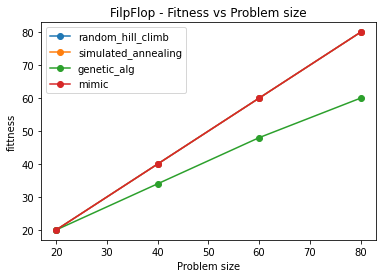

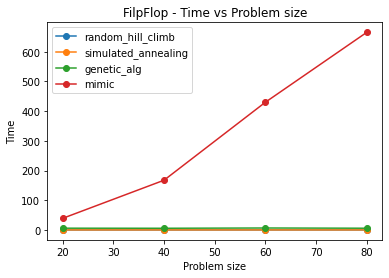

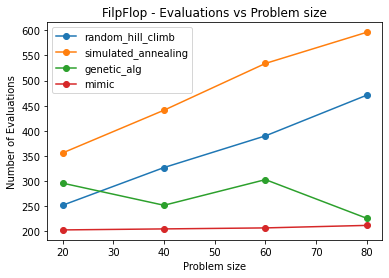

<Figure size 432x288 with 0 Axes>

In [7]:
plot_bit_size('fitness',__fitness_vals,'Problem size','fittness','FilpFlop - Fitness vs Problem size','./plot/flipflop_fitness_bitsize.png',__range)
plot_bit_size('times',__fitness_vals,'Problem size','Time','FilpFlop - Time vs Problem size','./plot/flipflop_time_bitsize.png',__range)
plot_bit_size('evaluations',__fitness_vals,'Problem size','Number of Evaluations','FilpFlop - Evaluations vs Problem size','./plot/flipflop_evaluations_bitsize.png',__range)

In [8]:
__max_iter = 20000
__max_attempt= 200
__range = range(20,81,20)
__fitness_vals = train_discrete_bit_size_problem('fourpeaks', __max_iter,__max_attempt,__range)

random_hill_climb
simulated_annealing


C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


genetic_alg
mimic


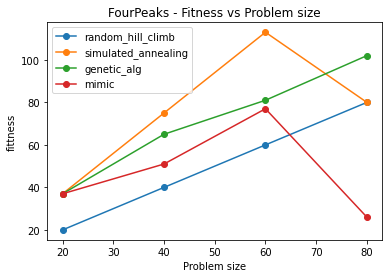

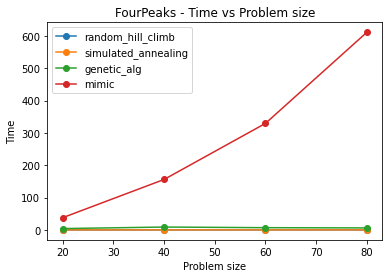

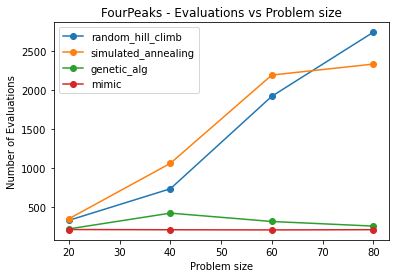

<Figure size 432x288 with 0 Axes>

In [9]:
plot_bit_size('fitness',__fitness_vals,'Problem size','fittness','FourPeaks - Fitness vs Problem size','./plot/fourpeaks_fitness_bitsize.png',__range)
plot_bit_size('times',__fitness_vals,'Problem size','Time','FourPeaks - Time vs Problem size','./plot/fourpeaks_time_bitsize.png',__range)
plot_bit_size('evaluations',__fitness_vals,'Problem size','Number of Evaluations','FourPeaks - Evaluations vs Problem size','./plot/fourpeaks_evaluations_bitsize.png',__range)

In [10]:
__max_iter = 20000
__max_attempt=200
__range = range(20,81,20)
__fitness_vals = train_discrete_bit_size_problem('kcolor', __max_iter,__max_attempt,__range)

random_hill_climb
simulated_annealing
genetic_alg
mimic


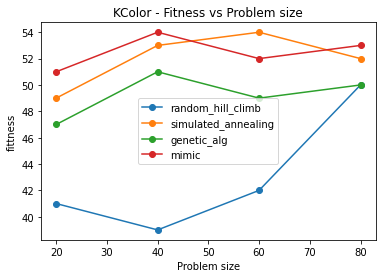

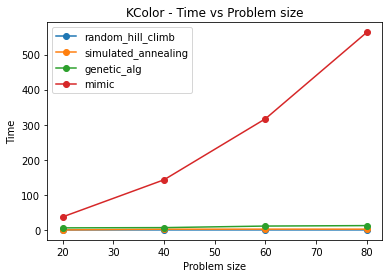

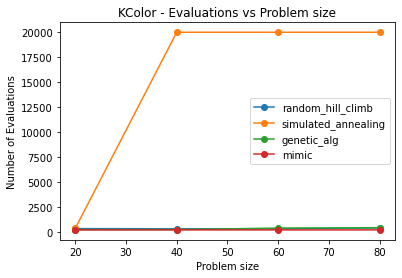

<Figure size 432x288 with 0 Axes>

In [11]:
plot_bit_size('fitness',__fitness_vals,'Problem size','fittness','KColor - Fitness vs Problem size','./plot/kcolor_fitness_bitsize.png',__range)
plot_bit_size('times',__fitness_vals,'Problem size','Time','KColor - Time vs Problem size','./plot/kcolor_time_bitsize.png',__range)
plot_bit_size('evaluations',__fitness_vals,'Problem size','Number of Evaluations','KColor - Evaluations vs Problem size','./plot/kcolor_evaluations_bitsize.png',__range)

In [12]:
__max_iter = 20000
__max_attempt=200
__range = range(20,81,20)
__fitness_vals = train_discrete_bit_size_problem('continouspeaks', __max_iter,__max_attempt,__range)

random_hill_climb
simulated_annealing


C:\Dev\Anaconda3\envs\VitrualEnv\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


genetic_alg
mimic


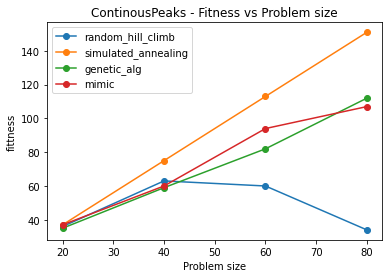

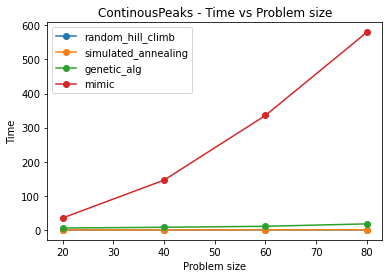

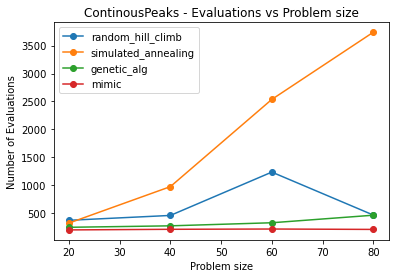

<Figure size 432x288 with 0 Axes>

In [13]:
plot_bit_size('fitness',__fitness_vals,'Problem size','fittness','ContinousPeaks - Fitness vs Problem size','./plot/continouspeaks_fitness_bitsize.png',__range)
plot_bit_size('times',__fitness_vals,'Problem size','Time','ContinousPeaks - Time vs Problem size','./plot/continouspeaks_time_bitsize.png',__range)
plot_bit_size('evaluations',__fitness_vals,'Problem size','Number of Evaluations','ContinousPeaks - Evaluations vs Problem size','./plot/continouspeaks_evaluations_bitsize.png',__range)